<a href="https://colab.research.google.com/github/amit-raj-repo/ML-Random-Forest-Python/blob/master/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

In [28]:
from google.colab import drive
drive.mount('/content/gdrive')

In [29]:
df = pd.read_csv("/content/gdrive/My Drive/Data/data.csv").dropna(axis = 0)
df.head()

In [4]:
#Seprating dependent and independent variables
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values

In [5]:
print(X.shape)

(169559, 25)


In [6]:
#Splitting into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    random_state=3)

In [ ]:
#===============================================================#
# Decision Tree Algorithm
#===============================================================#

In [15]:
model = RandomForestClassifier(n_estimators= 300, min_samples_split= 100,
                               min_samples_leaf= 30, bootstrap = True,
                               oob_score = True, random_state = 3,
                               verbose=0, max_features = 'auto')

In [16]:
#Fitting the Model
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=True, random_state=3, verbose=0,
                       warm_start=False)

In [17]:
#Getting the predictions
pred = model.predict(X_test)
predProb = model.predict_proba(X_test)

In [22]:
print(model.oob_score_)

0.9381925143939784


In [27]:
print(model.feature_importances_)

[0.00110588 0.00181657 0.00155544 0.00275749 0.00111953 0.00161683
 0.00144038 0.00181835 0.00221143 0.00337757 0.04001088 0.0150623
 0.29887329 0.16393959 0.0025443  0.01407421 0.01261404 0.01206202
 0.0075971  0.00547061 0.0027432  0.00539424 0.22819424 0.12582287
 0.04677762]


In [18]:
#Checking the accuracy
print(metrics.accuracy_score(y_test, pred))

0.9406699693323897


In [19]:
#Checking the confusion metrics
print(confusion_matrix(y_test, pred))

[[25536   374]
 [ 1638  6364]]


In [20]:
# Getting values for FPR and TPR
fpr, tpr, threshold = metrics.roc_curve(y_test, predProb[:,1])
roc_auc = metrics.auc(fpr, tpr)

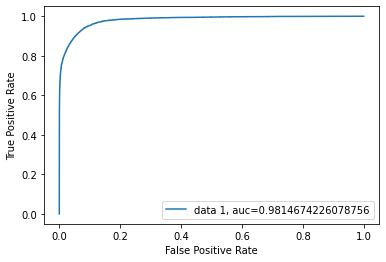

In [21]:
# ROC Curve
plt.plot(fpr,tpr,label="data 1, auc="+str(roc_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()